In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
import pandas as pd
from os.path import join

# Important group of nodes

The idea is to look for a group of nodes that is maintained throughout the layers.

We'll focus on two groups:

- core nodes
- hubs

In order to study the significance of the maintainance, we'll compare with SBMs.

## Hubs

Take hubs of top layer to compute the cumulative intersection across layers.

In [15]:
hubs = []
for tissue in ["healthy", "basal"]:
    for i in range(101):
        path = f"/Users/rdora/breast_cancer/{tissue}/gene-range_{i}.csv"
        temp = pd.read_csv(path)
        G = nx.from_pandas_edgelist(temp,
                                   source="gene_1",
                                   target="gene_2")
        deg = [d for v, d in G.degree]
        mu = np.mean(deg)
        sigma = np.std(deg)
        h = [[tissue, i, v, d] for v, d in G.degree if d >= mu + 2 * sigma]
        hubs.extend(h)
hubs = pd.DataFrame(hubs, columns=["tissue", "layer", "node", "degree"])

### Size of hub across layers

In [72]:
nums = hubs.groupby(["layer", "tissue"]).agg({"node": "count", "degree": "sum"}).reset_index()
nums.head()

,layer,tissue,node,degree
0,0,basal,341,8264
1,0,healthy,337,8229
2,1,basal,417,10116
3,1,healthy,493,12668
4,2,basal,418,10191


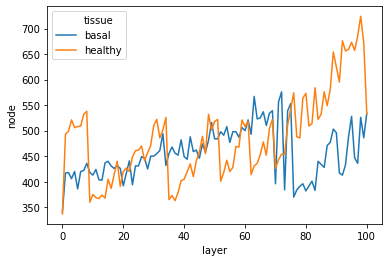

In [71]:
sns.lineplot(x="layer", y="node", hue="tissue", data=nums)

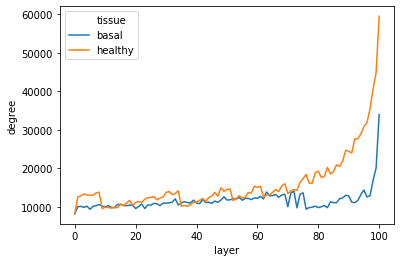

In [74]:
sns.lineplot(x="layer", y="degree", hue="tissue", data=nums)

In [133]:
# How many of the nodes in the top hub are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs = [[tissue, 100, len(int_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_hubs.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_hubs, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs = pd.concat(dfs)

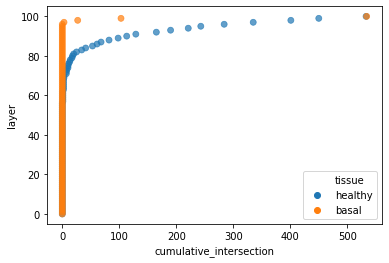

In [197]:
g = sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_hubs,
                   edgecolor=None, alpha=0.7)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/cum_int_hubs.png", dpi=300)

### Intersect the first layer with the rest

- Absolute values
- Divide it by the size of the layer

In [216]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs_top = [[tissue, 100, len(top_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_hubs_top.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_hubs_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs_top = pd.concat(dfs)

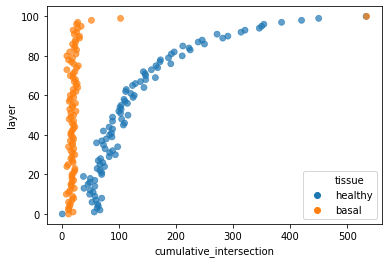

In [220]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_hubs_top,
               edgecolor=None, alpha=0.7)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_hubs.png", dpi=300)

In [212]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_hubs_top.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_hubs_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs_top = pd.concat(dfs)

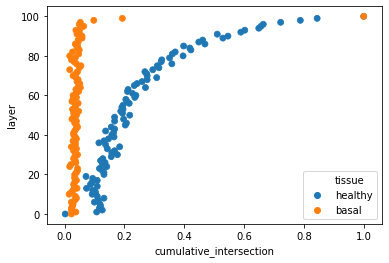

In [213]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_hubs_top,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_ratio_top_hubs.png", dpi=300)

In [214]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_hubs_top.append([tissue, i, len(int_nodes) / len(layer_nodes)])
    dfs.append(pd.DataFrame(int_hubs_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs_top = pd.concat(dfs)

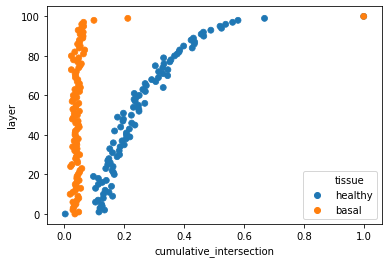

In [215]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_hubs_top,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_ratio_layer_hubs.png", dpi=300)

## Cores

Take core of top layer to compute the cumulative intersection across layers.

In [135]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_cores = [[tissue, 100, len(int_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_cores.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_cores, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores = pd.concat(dfs)

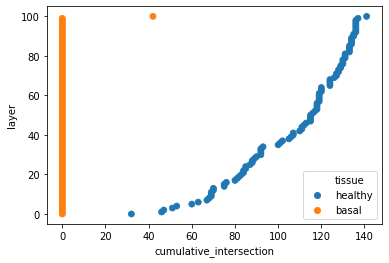

In [200]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores,
                   edgecolor=None, alpha=1)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/cum_int_cores.png", dpi=300)

### 30-core in the case of cancer

Let's see what happens when we take the 30-core

In [144]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(cores[(cores.layer==99)&(cores.tissue==tissue)].node.unique())
    int_cores_3 = [[tissue, 99, len(int_nodes)]]
    for i in range(98, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_cores_3.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_cores_3, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores_3 = pd.concat(dfs)

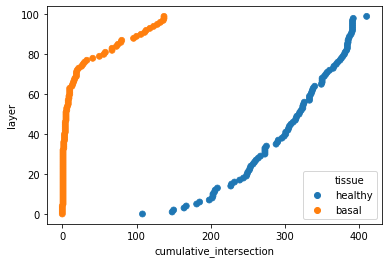

In [201]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores_3,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/cum_int_cores_99.png", dpi=300)

### Intersect the first layer with the rest

- Absolute values
- Divide it by the size of the layer

In [203]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_cores_top = [[tissue, 100, len(top_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_cores_top.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_cores_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores_top = pd.concat(dfs)

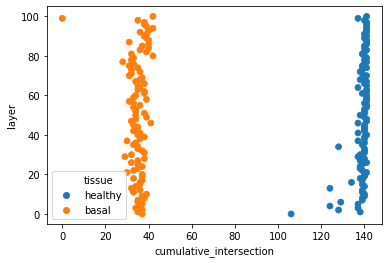

In [204]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores_top,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_cores.png", dpi=300)

In [206]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_cores_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_cores_top.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_cores_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores_top = pd.concat(dfs)

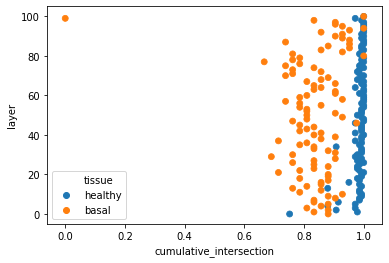

In [207]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores_top,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_ratio_top_cores.png", dpi=300)

In [208]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_cores_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_cores_top.append([tissue, i, len(int_nodes) / len(layer_nodes)])
    dfs.append(pd.DataFrame(int_cores_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores_top = pd.concat(dfs)

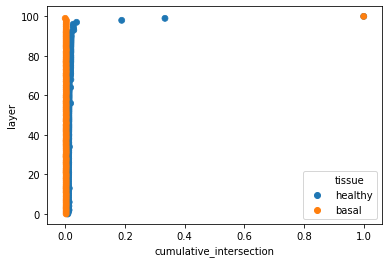

In [209]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores_top,
               edgecolor=None)
plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/top_int_ratio_layer_cores.png", dpi=300)

### SBM

In [221]:
sbm_h = pd.read_csv('/Users/rdora/breast_cancer/data/it1_cores_11.csv')
sbm_b = pd.read_csv('/Users/rdora/breast_cancer/data/it1_cores_11_basal.csv')

sbm = pd.concat([sbm_h, sbm_b]).drop(columns='iteration')
del sbm_h, sbm_b

# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(sbm[(sbm.layer==100)&(sbm.tissue==tissue)].node.unique())
    int_sbm = [[tissue, 100, len(int_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_sbm.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_sbm, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm = pd.concat(dfs)

In [226]:
int_sbm.head()

,tissue,layer,cumulative_intersection
0,healthy,100,11349
1,healthy,99,9203
2,healthy,98,7589
3,healthy,97,6297
4,healthy,96,5205


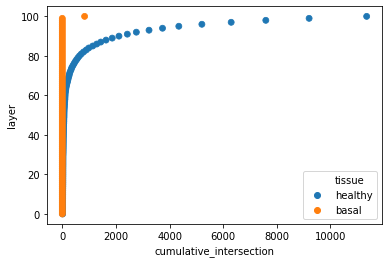

In [227]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm,
               edgecolor=None)

### SBM: 30-core in the case of cancer

Let's see what happens when we take the 30-core

In [229]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(sbm[(sbm.layer==99)&(sbm.tissue==tissue)].node.unique())
    int_sbm_3 = [[tissue, 99, len(int_nodes)]]
    for i in range(98, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_sbm_3.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_sbm_3, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm_3 = pd.concat(dfs)

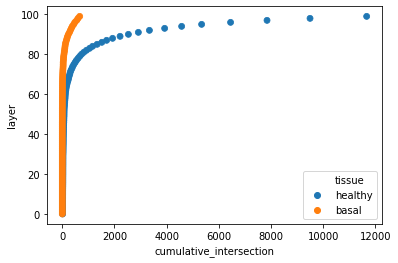

In [231]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm_3,
               edgecolor=None)
# plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/cum_int_cores_99.png", dpi=300)

In [232]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(sbm[(sbm.layer==98)&(sbm.tissue==tissue)].node.unique())
    int_sbm_3 = [[tissue, 98, len(int_nodes)]]
    for i in range(97, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_sbm_3.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_sbm_3, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm_3 = pd.concat(dfs)

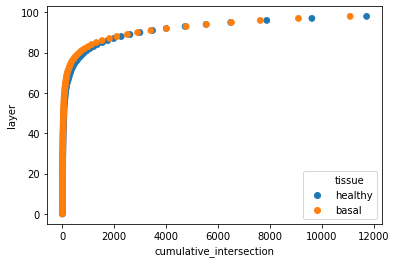

In [233]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm_3,
               edgecolor=None)
# plt.savefig("/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/cum_int_cores_99.png", dpi=300)

### Real and SBM

In [242]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(sbm[(sbm.layer==95)&(sbm.tissue==tissue)].node.unique())
    int_sbm_3 = [[tissue, 95, len(int_nodes)]]
    for i in range(94, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_sbm_3.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_sbm_3, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm_3 = pd.concat(dfs)

In [243]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    int_nodes = set(cores[(cores.layer==95)&(cores.tissue==tissue)].node.unique())
    int_cores_3 = [[tissue, 95, len(int_nodes)]]
    for i in range(94, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_cores_3.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_cores_3, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores_3 = pd.concat(dfs)

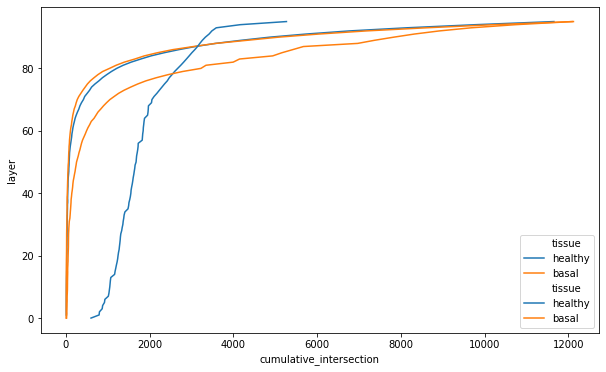

In [246]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm_3,
               ax=ax)
sns.lineplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_cores_3,
               ax=ax)

### Intersect the first layer with the rest

- Absolute values
- Divide it by the size of the layer

In [247]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(sbm[(sbm.layer==100)&(sbm.tissue==tissue)].node.unique())
    int_sbm_top = [[tissue, 100, len(top_nodes)]]
    for i in range(99, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_sbm_top.append([tissue, i, len(int_nodes)])
    dfs.append(pd.DataFrame(int_sbm_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm_top = pd.concat(dfs)

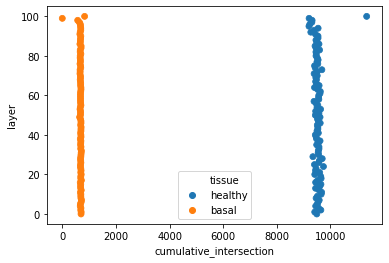

In [248]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm_top,
               edgecolor=None)

In [249]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(sbm[(sbm.layer==100)&(sbm.tissue==tissue)].node.unique())
    int_sbm_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_sbm_top.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_sbm_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm_top = pd.concat(dfs)

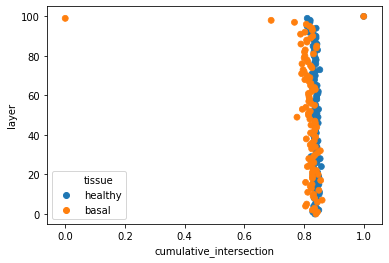

In [250]:
sns.scatterplot(x='cumulative_intersection', y='layer', hue='tissue', data=int_sbm_top,
               edgecolor=None)

# VS Plots